# New pour Analyse signaux – comparaison métier vs modèle
1️ - calculer un score métier à partir des pondérations de Laetitia

2️ - entraîner le modèle dessus

3️ - comparer score métier vs score modèle (corrélation, scatter, tableaux goldens/chèvres, etc.)

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set path to datasets
DATA_DIR = Path('../src/ose_core/data_ingestion/extracted_datasets')

print("Libraries imported successfully!")


Libraries imported successfully!


In [33]:
# Load signals data
df_signals = pd.read_csv(DATA_DIR / '08_signals.csv', dtype={'siren': str, 'siret': str})

print(f"Dataset shape: {df_signals.shape}")
print(f"\nColumns: {list(df_signals.columns)}")
display(df_signals.head(10))

Dataset shape: (2133, 12)

Columns: ['company_name', 'siren', 'siret', 'continent', 'country', 'departement', 'publishedAt', 'isMain', 'type', 'createdAt', 'companies_count', 'sirets_count']


,company_name,siren,siret,continent,country,departement,publishedAt,isMain,type,createdAt,companies_count,sirets_count
0,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2021-09-30T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2020-09-07T15:14:38+02:00,1,1
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2020-09-08T00:00:00+02:00,True,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-07T15:14:12+02:00,1,1
2,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-09-21T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-20T10:45:13+02:00,1,1
3,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-05T11:16:18+02:00,1,1
4,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-05T11:15:32+02:00,1,1
5,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'H', 'id': 8, 'label': 'Activité inte...",2018-04-05T11:14:31+02:00,1,1
6,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2014-05-20T00:00:00+02:00,True,"{'code': 'X', 'id': 25, 'label': 'Actualité en...",2014-05-16T10:10:24+02:00,1,1
7,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-04-01T00:00:00+02:00,True,"{'code': 'U', 'id': 21, 'label': 'Nomination'}",2016-03-31T12:48:27+02:00,1,1
8,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,"[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2016-09-21T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2016-09-20T10:45:56+02:00,1,1
9,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-04-01T00:00:00+02:00,True,"{'code': 'Hbis', 'id': 24, 'label': 'Activité ...",2016-03-28T19:33:31+02:00,1,1


In [34]:
# Summary
print(f"\nSignals Summary:")
print(f"Total signal records: {len(df_signals)}")
print(f"Unique companies with signals: {df_signals['siren'].nunique()}")
print(f"Average signals per company: {len(df_signals) / df_signals['siren'].nunique():.1f}")
print(f"\nSignal types:")
if 'type' in df_signals.columns:
    print(df_signals['type'].value_counts().head(10))
print(f"\nCountries:")
if 'country' in df_signals.columns:
    print(df_signals['country'].value_counts().head(10))


Signals Summary:
Total signal records: 2133
Unique companies with signals: 266
Average signals per company: 8.0

Signal types:
type
{'code': 'B', 'id': 2, 'label': 'Construction'}                                       309
{'code': 'K1', 'id': 32, 'label': 'Investissements'}                                  282
{'code': 'N', 'id': 14, 'label': 'Recrutement'}                                       214
{'code': 'L', 'id': 12, 'label': 'Levée de fonds, financements & modifs. capital'}    205
{'code': 'F', 'id': 6, 'label': "Développement de l'activité"}                        193
{'code': 'Hbis', 'id': 24, 'label': 'Activité internationale (industrie)'}            129
{'code': 'P', 'id': 16, 'label': 'Vente & Cession'}                                   105
{'code': 'S', 'id': 19, 'label': 'Lancement'}                                          87
{'code': 'E', 'id': 5, 'label': 'Créations & ouvertures'}                              63
{'code': 'U', 'id': 21, 'label': 'Nomination'}           

In [35]:
df_sig = df_signals.copy()

In [36]:
#nettoyage
#transfo date
def to_datetime_robust(series):
    """
    Convertit une série en datetime en gérant :
    - timestamps numériques (en secondes)
    - strings '2024-01-01T...' ou similaires
    """
    if np.issubdtype(series.dtype, np.number):
        return pd.to_datetime(series, unit="s", errors="coerce")
    else:
        return pd.to_datetime(series, errors="coerce")

In [37]:
# SIREN en string
df_sig["siren"] = df_sig["siren"].astype(str)


df_sig["publishedAt_dt"] = to_datetime_robust(df_sig["publishedAt"])
df_sig["createdAt_dt"]   = to_datetime_robust(df_sig["createdAt"])

# Date du signal : priorité publishedAt, sinon createdAt
df_sig["sig_date"] = df_sig["publishedAt_dt"].fillna(df_sig["createdAt_dt"])

# (optionnel mais propre) : enlever les lignes sans date exploitable
df_sig = df_sig[~df_sig["sig_date"].isna()].copy()

# Petit check
display(df_sig['type'].value_counts().head(10))
display(df_sig[["siren", "type", "sig_date"]].head())

/tmp/ipykernel_140667/1670592371.py:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  return pd.to_datetime(series, errors="coerce")
/tmp/ipykernel_140667/1670592371.py:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  return pd.to_datetime(series, errors="coerce")


type
{'code': 'B', 'id': 2, 'label': 'Construction'}                                       309
{'code': 'K1', 'id': 32, 'label': 'Investissements'}                                  282
{'code': 'N', 'id': 14, 'label': 'Recrutement'}                                       214
{'code': 'L', 'id': 12, 'label': 'Levée de fonds, financements & modifs. capital'}    205
{'code': 'F', 'id': 6, 'label': "Développement de l'activité"}                        193
{'code': 'Hbis', 'id': 24, 'label': 'Activité internationale (industrie)'}            129
{'code': 'P', 'id': 16, 'label': 'Vente & Cession'}                                   105
{'code': 'S', 'id': 19, 'label': 'Lancement'}                                          87
{'code': 'E', 'id': 5, 'label': 'Créations & ouvertures'}                              63
{'code': 'U', 'id': 21, 'label': 'Nomination'}                                         45
Name: count, dtype: int64

,siren,type,sig_date
0,015751530,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2021-09-30 00:00:00+02:00
1,015751530,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-08 00:00:00+02:00
2,015751530,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-21 00:00:00+02:00
3,015751530,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-06 00:00:00+02:00
4,015751530,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-06 00:00:00+02:00


In [38]:
df_sig.head()

,company_name,siren,siret,continent,country,departement,publishedAt,isMain,type,createdAt,companies_count,sirets_count,publishedAt_dt,createdAt_dt,sig_date
0,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2021-09-30T00:00:00+02:00,True,"{'code': 'K1', 'id': 32, 'label': 'Investissem...",2020-09-07T15:14:38+02:00,1,1,2021-09-30 00:00:00+02:00,2020-09-07 15:14:38+02:00,2021-09-30 00:00:00+02:00
1,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 6, 'label': 'Europe'}]","[{'id': 72, 'label': 'France'}]","[{'parent': 'Bourgogne-Franche-Comté', 'id': 2...",2020-09-08T00:00:00+02:00,True,"{'code': 'L', 'id': 12, 'label': 'Levée de fon...",2020-09-07T15:14:12+02:00,1,1,2020-09-08 00:00:00+02:00,2020-09-07 15:14:12+02:00,2020-09-08 00:00:00+02:00
2,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,NaN,NaN,NaN,2016-09-21T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2016-09-20T10:45:13+02:00,1,1,2016-09-21 00:00:00+02:00,2016-09-20 10:45:13+02:00,2016-09-21 00:00:00+02:00
3,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'F', 'id': 6, 'label': ""Développement...",2018-04-05T11:16:18+02:00,1,1,2018-04-06 00:00:00+02:00,2018-04-05 11:16:18+02:00,2018-04-06 00:00:00+02:00
4,PAIN D'EPICES MULOT ET PETITJEAN,015751530,01575153000013,"[{'id': 1, 'label': 'Asie'}]",NaN,NaN,2018-04-06T00:00:00+02:00,True,"{'code': 'E', 'id': 5, 'label': 'Créations & o...",2018-04-05T11:15:32+02:00,1,1,2018-04-06 00:00:00+02:00,2018-04-05 11:15:32+02:00,2018-04-06 00:00:00+02:00


In [39]:
import ast

def normalize_type(type_str):
    """
    À partir d'une chaîne du type "{'code': 'L', 'label_short': ..., 'id': 12, 'label': ...}",
    retourne un identifiant unique basé uniquement sur code + id + label.
    """
    try:
        d = ast.literal_eval(type_str)  # convertir la string en dict
        code = d.get("code")
        type_id = d.get("id")
        label = d.get("label")
        return f"{code}_{type_id}_{label}"
    except:
        return None

df_sig["type_normalized"] = df_sig["type"].apply(normalize_type)

In [40]:
df_pivot = (
    df_sig
      .groupby(["siren", "type_normalized"])
      .size()
      .reset_index(name="count")
      .pivot(index="siren", columns="type_normalized", values="count")
      .fillna(0)
)

df_pivot.head(5)

type_normalized,A_1_Aménagement & urbanisme,B_2_Construction,D_4_Litige,D_4_Litiges,E_5_Création & ouverture,E_5_Créations & ouvertures,F_6_Croissance,F_6_Développement de l'activité,G_7_Déménagement,H_8_Activité internationale (tertiaire),...,R_18_Décroissance,S_19_Lancement,U_21_Nomination,W_23_Foncier & bâti,X_25_Actualité entreprise,Y_26_Veille sectorielle,Z1_29_Engagement vert,"Z2_30_Restructuration, Réorganisation",Z3_33_Politique RH & RSE,Z_27_Salon & agenda
siren,,,,,,,,,,,,,,,,,,,,,
015751530,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
046580031,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
057504649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
086781150,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
096780838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [41]:
# diversité des signaux
df_pivot["diversite_signaux"] = (df_pivot > 0).sum(axis=1)
#print(df_pivot["diversite_signaux"].head)

In [42]:
df_recency = (
    df_sig
      .groupby("siren")["sig_date"]
      .max()
      .reset_index()
      .rename(columns={"sig_date": "last_signal_date"})
)
df_recency.head(5)

,siren,last_signal_date
0,015751530,2025-03-03 00:15:21+01:00
1,046580031,2022-08-08 00:00:00+02:00
2,057504649,2024-06-16 00:00:00+02:00
3,086781150,2023-06-29 00:00:00+02:00
4,096780838,2024-03-11 00:00:00+01:00


In [43]:
# date signal la plus récente
reference_date = df_recency["last_signal_date"].max()
reference_date

Timestamp('2025-11-19 00:15:35+0100', tz='UTC+01:00')

In [44]:
df_recency["last_signal_date"] = pd.to_datetime(
    df_recency["last_signal_date"],
    errors="coerce"
)

# Delta en jours
df_recency["recency_jours"] = (reference_date - df_recency["last_signal_date"]).dt.days

df_recency["recency_jours"].head(5)

0    261.0
1      NaN
2      NaN
3      NaN
4    618.0
Name: recency_jours, dtype: float64

In [45]:
# merge signaux et recency par siren pour le model
df_model = df_pivot.merge(df_recency[["siren", "recency_jours"]], on="siren", how="left")
# dégager les NaN dans recency
df_model["recency_jours"] = df_model["recency_jours"].fillna(df_model["recency_jours"].max())
df_model.head()

,siren,A_1_Aménagement & urbanisme,B_2_Construction,D_4_Litige,D_4_Litiges,E_5_Création & ouverture,E_5_Créations & ouvertures,F_6_Croissance,F_6_Développement de l'activité,G_7_Déménagement,...,U_21_Nomination,W_23_Foncier & bâti,X_25_Actualité entreprise,Y_26_Veille sectorielle,Z1_29_Engagement vert,"Z2_30_Restructuration, Réorganisation",Z3_33_Politique RH & RSE,Z_27_Salon & agenda,diversite_signaux,recency_jours
0,015751530,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11,261.0
1,046580031,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4017.0
2,057504649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4017.0
3,086781150,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4017.0
4,096780838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5,618.0


## 1. Construire le score métier (target Laetitia)

In [46]:
# Extraire code_signal et appliquer les pondérations
def extract_code(type_str):
    try:
        d = ast.literal_eval(type_str)
        return d.get("code")
    except Exception:
        return None

df_sig["code_signal"] = df_sig["type"].apply(extract_code)

# Pondérations métier (Laetitia)
w_type = {
    "B":  25,  # Construction (usine)
    "W":  15,  # Foncier / bâti
    "E":  20,  # Création nouvelle usine
    "F":  15,  # Croissance prod.
    "N":  10,  # Recrutement
    "S":   7,  # Lancement produit
    "K1":  8,  # Investissements
    "I": -15,  # Fermeture établissement
    "M": -20,  # Licenciements / chômage
    "O": -50,  # RJ / LJ
}

df_sig["w_type"] = df_sig["code_signal"].map(w_type).fillna(0)

In [47]:
# 0. Ajouter recency_jours dans df_sig à partir de df_recency
df_sig = df_sig.merge(
    df_recency[["siren", "recency_jours"]],
    on="siren",
    how="left"
)

# si jamais certaines lignes n'ont pas de recency (rare), on met le max
df_sig["recency_jours"] = df_sig["recency_jours"].fillna(df_sig["recency_jours"].max())

# 1. Décote temporelle (à ajuster si besoin)
alpha = 0.0005
df_sig["decay"] = 1 / (1 + alpha * df_sig["recency_jours"])

# 2. Contribution métier par signal
df_sig["signal_contrib"] = df_sig["w_type"] * df_sig["decay"]

In [48]:
# Agrégation par SIREN = score métier brut
signal_target = (
    df_sig
      .groupby("siren")["signal_contrib"]
      .sum()
      .reset_index()
      .rename(columns={"signal_contrib": "signal_target_raw"})
)

# Normalisation (pour avoir une target centrée-réduite)
mu = signal_target["signal_target_raw"].mean()
sigma = signal_target["signal_target_raw"].std()

signal_target["signal_target_norm"] = (
    (signal_target["signal_target_raw"] - mu) / sigma
)

signal_target.head()

,siren,signal_target_raw,signal_target_norm
0,015751530,168.951791,1.984521
1,046580031,22.602626,-0.174781
2,057504649,10.968921,-0.346430
3,086781150,16.619578,-0.263058
4,096780838,13.750955,-0.305383


In [49]:
# 1. Partir du pivot (une ligne par siren, colonnes = types de signaux)
df_model = df_pivot.reset_index()  # siren redevient une colonne

# 2. Ajouter recency_jours
df_model = df_model.merge(
    df_recency[["siren", "recency_jours"]],
    on="siren",
    how="left"
)
df_model["recency_jours"] = df_model["recency_jours"].fillna(df_model["recency_jours"].max())

# 3. Ajouter un nb_signaux_total
signal_cols = [c for c in df_model.columns if c not in ["siren", "diversite_signaux", "recency_jours"]]
df_model["nb_signaux_total"] = df_model[signal_cols].sum(axis=1)

# 4. Ajouter la target métier
df_model = df_model.merge(
    signal_target[["siren", "signal_target_raw", "signal_target_norm"]],
    on="siren",
    how="left"
)

df_model.head()

,siren,A_1_Aménagement & urbanisme,B_2_Construction,D_4_Litige,D_4_Litiges,E_5_Création & ouverture,E_5_Créations & ouvertures,F_6_Croissance,F_6_Développement de l'activité,G_7_Déménagement,...,Y_26_Veille sectorielle,Z1_29_Engagement vert,"Z2_30_Restructuration, Réorganisation",Z3_33_Politique RH & RSE,Z_27_Salon & agenda,diversite_signaux,recency_jours,nb_signaux_total,signal_target_raw,signal_target_norm
0,015751530,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11,261.0,20.0,168.951791,1.984521
1,046580031,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,4017.0,5.0,22.602626,-0.174781
2,057504649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,4017.0,2.0,10.968921,-0.346430
3,086781150,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,4017.0,2.0,16.619578,-0.263058
4,096780838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,5,618.0,6.0,13.750955,-0.305383


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Features = toutes les colonnes sauf identifiant + targets
features_list = [
    col for col in df_model.columns
    if col not in ["siren", "signal_target_raw", "signal_target_norm"]
]

X = df_model[features_list]
y = df_model["signal_target_norm"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_tree = XGBRegressor(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

pipe_xgb = Pipeline([
    ("scaler", StandardScaler()),
    ("model", model_tree)
])

pipe_xgb.fit(X_train, y_train)

pred_test = pipe_xgb.predict(X_test)
print("R² =", r2_score(y_test, pred_test))
print("MAE =", mean_absolute_error(y_test, pred_test))

R² = 0.8309616831807283
MAE = 0.13301601218627923


In [51]:
df_model["signal_score_model"] = pipe_xgb.predict(X)

In [52]:
compare_scores = df_model[[
    "siren",
    "signal_target_norm",
    "signal_score_model"
]].copy()

compare_scores["diff"] = compare_scores["signal_score_model"] - compare_scores["signal_target_norm"]
compare_scores["rank_target"] = compare_scores["signal_target_norm"].rank(ascending=False)
compare_scores["rank_model"] = compare_scores["signal_score_model"].rank(ascending=False)
compare_scores["delta_rank"] = compare_scores["rank_model"] - compare_scores["rank_target"]

compare_scores.head()


,siren,signal_target_norm,signal_score_model,diff,rank_target,rank_model,delta_rank
0,015751530,1.984521,1.984238,-0.000283,9.0,8.0,-1.0
1,046580031,-0.174781,-0.173995,0.000786,106.0,105.0,-1.0
2,057504649,-0.346430,-0.341355,0.005075,168.0,165.0,-3.0
3,086781150,-0.263058,-0.251011,0.012047,135.5,128.5,-7.0
4,096780838,-0.305383,-0.261173,0.044210,150.0,134.0,-16.0


Corrélation target métier vs score modèle : 0.9867996047295342


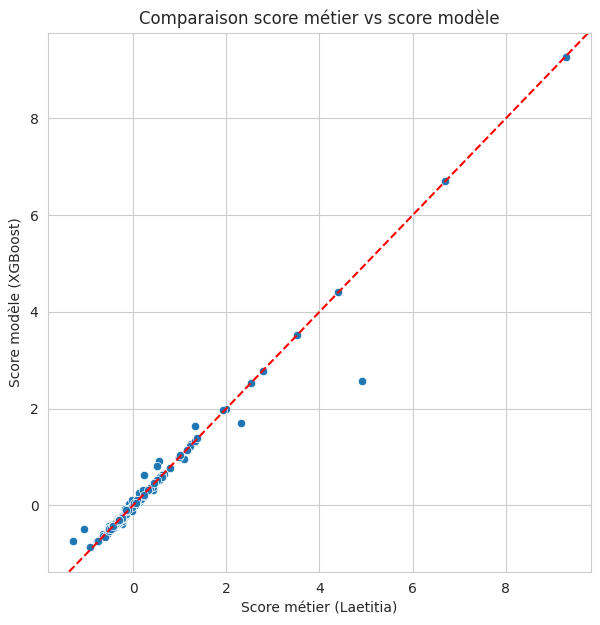

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = compare_scores[["signal_target_norm", "signal_score_model"]].corr().iloc[0,1]
print("Corrélation target métier vs score modèle :", corr)

plt.figure(figsize=(7,7))
sns.scatterplot(
    data=compare_scores,
    x="signal_target_norm",
    y="signal_score_model"
)
plt.axline((0,0), (1,1), color="red", linestyle="--")
plt.xlabel("Score métier (Laetitia)")
plt.ylabel("Score modèle (XGBoost)")
plt.title("Comparaison score métier vs score modèle")
plt.show()


In [54]:
goldens = ["509935151","636220220","538866740","518802459","375980075","444323893","419239181"]
chevres = ["534948617","393891825","418480687"]

print("GOLDENS :")
display(
    compare_scores[compare_scores["siren"].isin(goldens)]
    .sort_values("signal_target_norm", ascending=False)
)

print("CHEVRES :")
display(
    compare_scores[compare_scores["siren"].isin(chevres)]
    .sort_values("signal_target_norm", ascending=False)
)

GOLDENS :


,siren,signal_target_norm,signal_score_model,diff,rank_target,rank_model,delta_rank
219,538866740,9.288687,9.263330,-0.025358,1.0,1.0,0.0
208,518802459,6.688305,6.696051,0.007746,2.0,2.0,0.0
228,636220220,4.405794,4.405288,-0.000506,4.0,3.0,-1.0
204,509935151,3.523028,3.516270,-0.006758,5.0,4.0,-1.0
173,444323893,0.570521,0.579945,0.009424,26.0,27.0,1.0
97,375980075,0.563755,0.908880,0.345126,27.0,21.0,-6.0
150,419239181,-0.125739,-0.152068,-0.026330,96.5,100.0,3.5


CHEVRES :


,siren,signal_target_norm,signal_score_model,diff,rank_target,rank_model,delta_rank
217,534948617,1.370059,1.390631,0.020572,11.0,12.0,1.0
126,393891825,0.243830,0.622980,0.379150,43.0,26.0,-17.0
148,418480687,-0.557313,-0.587440,-0.030126,253.0,254.0,1.0


### SHAP vizualization

In [55]:
import shap
# Run the following command. Needed for some visualizations.
shap.initjs()

In [56]:
# On choisit une ligne de X_test à expliquer
row_to_show = 0  # je peux changer l'index
feature_values = X_test.iloc[[row_to_show]]

# Prédiction du modèle pour cette instance
prediction = pipe_xgb.predict(feature_values)
print(f"{'Prédiction du modèle pour cette instance':<35}{prediction[0]:>7.3f}")

Prédiction du modèle pour cette instance -0.409


In [57]:
# Step 1 : créer l'explainer SHAP sur le modèle
explainer = shap.Explainer(model_tree)

# Step 2 : calculer les valeurs de SHAP pour cette instance
shap_values_one = explainer(feature_values)

# Have a look at these values
print(f"{'Base value:':<35}{shap_values_one.base_values[0]:>7.3f}")
print(f"{'Sum of SHAP values:':<35}{shap_values_one.values.sum():>7.3f}")
print(f"{'The prediction for this instance:':<35}{prediction[0]:>7.3f}")

Base value:                          0.018
Sum of SHAP values:                  0.328
The prediction for this instance:   -0.409


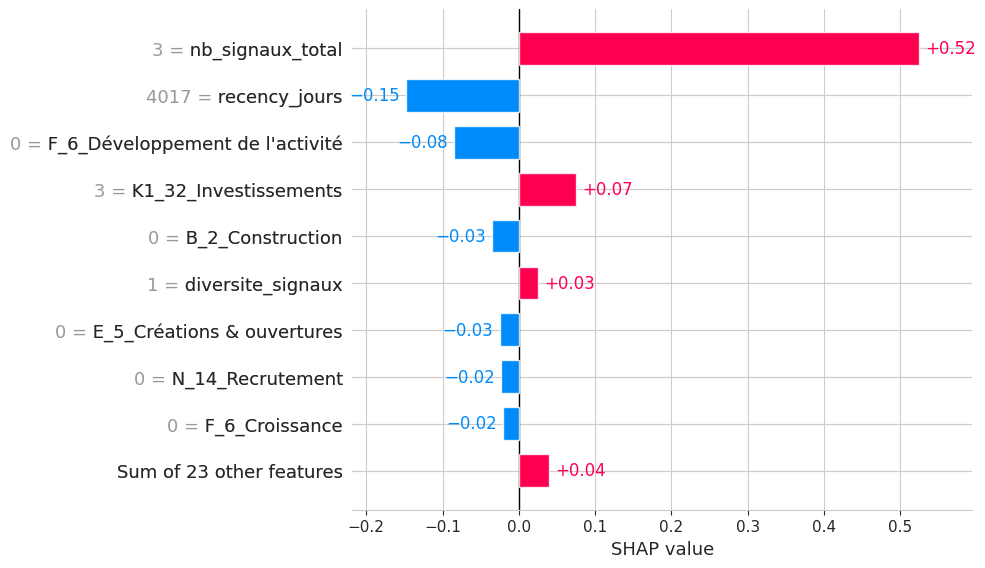

In [58]:
shap.plots.bar(shap_values_one[0])

In [59]:
shap.plots.force(shap_values_one[0])

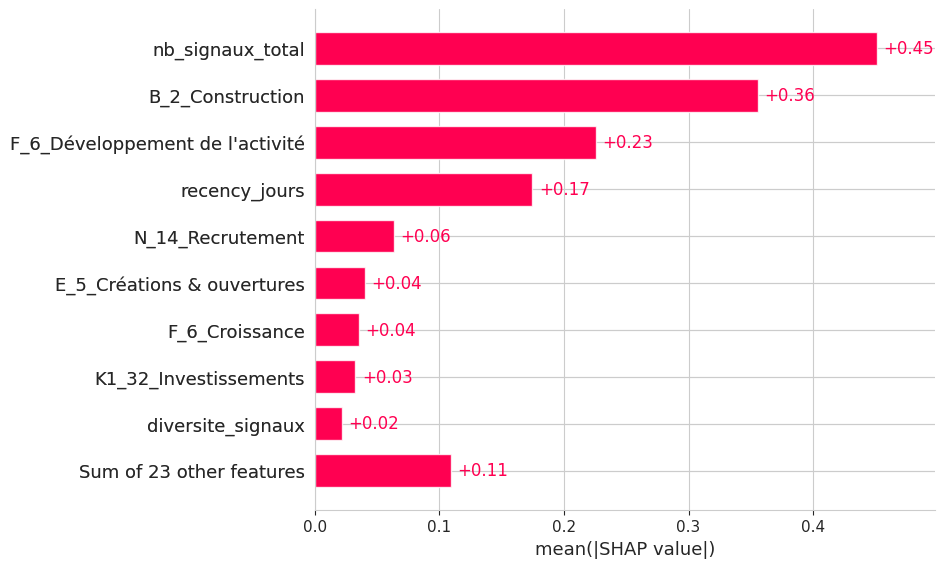

In [60]:
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

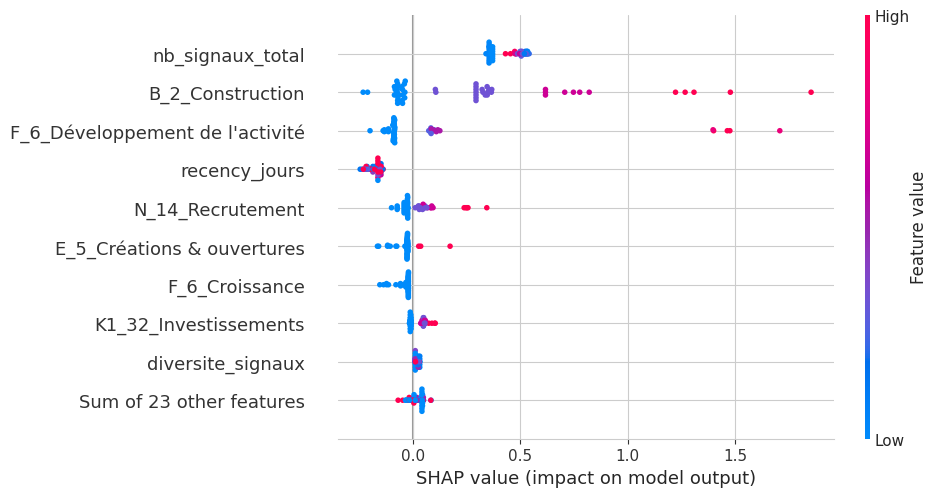

In [61]:
shap.plots.beeswarm(shap_values)